# Importing Library

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from glob import glob 
import seaborn as sns
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Using TensorFlow backend.


/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg
/kaggle/input/chest-xray-pneumo

/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person264_virus_547.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person872_bacteria_2795.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person415_bacteria_1839.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person701_bacteria_2600.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person62_bacteria_301.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person291_bacteria_1374.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person661_virus_1245.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person462_bacteria_1961.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person755_bacteria_26

/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0617-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0668-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1423-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0912-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1010-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0563-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0432-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0588-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1345-0001-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/c

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person817_bacteria_2728.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person423_bacteria_1855.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person257_bacteria_1191.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1542_virus_2683.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person73_bacteria_355.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person52_bacteria_251.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person492_bacteria_2085.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person590_virus_1138.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1056_virus_1755.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1405_virus_240

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0242-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1047-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0553-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0578-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0945-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0520-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1291-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0871-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0533-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1142-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0173-0001-0002.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0323-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/IM-0081-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0316-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0198-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0349-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0315-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/IM-0095-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0351-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/IM-0075-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/

/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person957_virus_1629.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1372_bacteria_3498.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1284_bacteria_3247.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person439_virus_891.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person501_bacteria_2113.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1559_bacteria_4067.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1001_bacteria_2932.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person739_virus_1361.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1644_bacteria_4357.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person537_bacteria_2261.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person365_virus_745.jpeg
/kaggle/

/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person843_virus_1485.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person15_bacteria_52.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person502_bacteria_2117.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1472_bacteria_3834.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person577_bacteria_2378.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1942_bacteria_4865.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person747_virus_1370.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1323_bacteria_3362.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1643_bacteria_4354.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person641_virus_1222.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person896_bacteria_2821.jpeg
/kaggle

/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0242-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1047-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0553-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0578-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0945-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0520-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1291-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0871-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0533-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1142-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1422-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0588-0001.j

/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0327-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0079-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0086-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0079-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0023-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0036-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0033-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0061-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0051-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0287-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0092-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0003-0001.jpeg
/kaggle/input/chest-xray-pneumon

# Data Exploration

os. listdir() method in python is used to get the list of all files and directories in the specified directory

In [2]:
print(os.listdir("../input/chest-xray-pneumonia/chest_xray"))

['val', '__MACOSX', 'chest_xray', 'train', 'test']


In [3]:
train = "../input/chest-xray-pneumonia/chest_xray/train"
val = "../input/chest-xray-pneumonia/chest_xray/val"
test = "../input/chest-xray-pneumonia/chest_xray/test"

# Visualization of x-ray image

In Python, the glob module is used to retrieve files/path names matching a specified pattern.

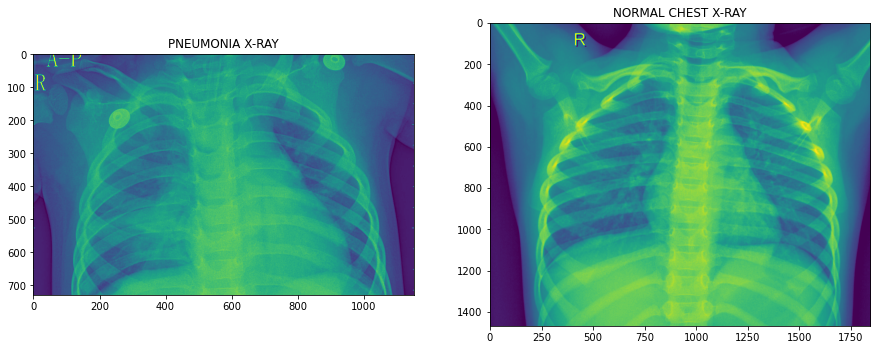

In [4]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
img = glob(train+"/PNEUMONIA/*.jpeg") #Getting an image in the PNEUMONIA folder
img = np.asarray(plt.imread(img[0]))
plt.title('PNEUMONIA X-RAY')
plt.imshow(img)

plt.subplot(1 , 2 , 2)
img = glob(train+"/NORMAL/*.jpeg") #Getting an image in the NORMAL folder
img = np.asarray(plt.imread(img[0]))
plt.title('NORMAL CHEST X-RAY')
plt.imshow(img)

plt.show()

# Data Augmentation

This is called image preprocessing, or data augmentation. We will be using the ImageDataGenerator() class from Keras for our data augmentation. Data augmentation helps us to expand our training dataset. The more training data the better. With more training data, overfitting becomes less of a problem as our model has to generalize more.

* The first step is to rescale our data. Rescaling images is a common practice because most images have RGB values ranging from 0-255. These values are too high for most models to handle, but by multiplying these values by 1/255, we can condense each RGB value to a value between 0-1. This is much easier for our model to process.

* Next we have shear_range which will randomly apply shear mapping, or shear transformations to the data. The value "0.2" is the shear intensity, or shear angle.

* zoom_range is also set to "0.2". This is for randomly zooming in on the images.

* horizontal_flip is set to "True" because we want to randomly flip half of the images in our dataset.

* rotation_range is the value in degrees for which the image may be randomly rotated.
* width_shift_range and height_shift_range are ranges for randomly translating images.

In [5]:
train_datagen = ImageDataGenerator(rescale            = 1/255,
                                   shear_range        = 0.2,
                                   zoom_range         = 0.2,
                                   horizontal_flip    = True,
                                   rotation_range     = 40,
                                   width_shift_range  = 0.2,
                                   height_shift_range = 0.2)


In [6]:
test_datagen = ImageDataGenerator(rescale = 1/255)

In [7]:
training_set = train_datagen.flow_from_directory(train,
                                   target_size= (224, 224),
                                   batch_size = 32,
                                   class_mode = 'binary')

val_set = test_datagen.flow_from_directory(val,
                                   target_size=(224, 224),
                                   batch_size = 32,
                                   class_mode ='binary')

test_set = test_datagen.flow_from_directory(test,
                                   target_size= (224, 224),
                                   batch_size = 32,
                                   class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Model Formation

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)            

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
nb_train_samples = 5217
nb_validation_samples = 17
epochs = 20
batch_size = 16

In [12]:
model_train = model.fit_generator(training_set,
                         steps_per_epoch=nb_train_samples // batch_size,
                         epochs=epochs,
                         validation_data=val_set,
                         validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
326/326 [==============================] - 398s 1s/step - loss: 0.3537 - accuracy: 0.8338 - val_loss: 0.8108 - val_accuracy: 0.5625
Epoch 2/20
326/326 [==============================] - 360s 1s/step - loss: 0.2958 - accuracy: 0.8678 - val_loss: 0.5292 - val_accuracy: 0.7500
Epoch 3/20
326/326 [==============================] - 353s 1s/step - loss: 0.2748 - accuracy: 0.8772 - val_loss: 0.4415 - val_accuracy: 0.8125
Epoch 4/20
326/326 [==============================] - 354s 1s/step - loss: 0.2541 - accuracy: 0.8912 - val_loss: 0.5742 - val_accuracy: 0.6250
Epoch 5/20
326/326 [==============================] - 354s 1s/step - loss: 0.2374 - accuracy: 0.8995 - val_loss: 0.3890 - val_accuracy: 0.7500
Epoch 6/20
326/326 [==============================] - 367s 1s/step - loss: 0.2152 - accuracy: 0.9141 - val_loss: 0.4495 - val_accuracy: 0.7500
Epoch 7/20
326/326 [==============================] - 365s 1s/step - loss: 0.2030 - accuracy: 0.9134 - val_loss: 0.3586 - val_accuracy: 0.8750

# Evaluate the Model


In [13]:
# model.evaluate_generator(generator=val_set,
# steps=100)
# evaluate the model
scores = model.evaluate_generator(test_set)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 86.22%


# Prediction

In [14]:
# Get the predictions on test set
preds = model.predict(test_set)
preds = np.squeeze((preds > 0.5).astype('int'))

# Example to show how our model working

In [15]:
path_val_image = "../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg" # copied path of the Pneumonia X-ray image


In [16]:
from keras.preprocessing import image

img = image.load_img(path_val_image, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

classes = model.predict(x)
print(classes)
if classes>0.5:
    print(" pneumonia")
else:
    print("normal")

[[1.]]
 pneumonia


# If you like my kernel... Please upvote...